<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dataset**

This includes the Data overview and the description section. I have also checked if the data has some missing values.

In [44]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    "class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor", "gill_attachment",
    "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring",
    "stalk_surface_below_ring", "stalk_color_above_ring", "stalk_color_below_ring", "veil_type",
    "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"
]
data = pd.read_csv(url, header=None, names=column_names)

# Display basic information
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [45]:
data.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [46]:
data_nulled = data.isnull().sum()
data_nulled

,0
class,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


**Data Preprocessing**

In [47]:
data = data.replace("?", pd.NA)  # Replace '?' with NA
data = data.dropna()  # Drop rows with missing values

from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
data["class"] = label_encoder.fit_transform(data["class"])  # 0: edible, 1: poisonous

# One-hot encode features
features = data.drop("class", axis=1)
features = pd.get_dummies(features, drop_first=True)  # Convert categorical to one-hot encoding
target = data["class"]

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


**Chi Square Test**

In [52]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply Chi-Square Test
chi2_selector = SelectKBest(chi2, k=10)  # Select top 10 features
X_new = chi2_selector.fit_transform(features, target)

# Get selected feature names
selected_features = features.columns[chi2_selector.get_support()]
print("Selected Features: ", selected_features)


Selected Features:  Index(['odor_f', 'odor_n', 'stalk_shape_t', 'stalk_surface_above_ring_k',
       'stalk_surface_above_ring_s', 'stalk_surface_below_ring_k',
       'stalk_surface_below_ring_s', 'stalk_color_above_ring_n', 'ring_type_l',
       'spore_print_color_n'],
      dtype='object')


**FFNN- Improved Model**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8222 - loss: 0.3902 - val_accuracy: 0.9044 - val_loss: 0.1686
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8951 - loss: 0.1820 - val_accuracy: 0.9150 - val_loss: 0.1494
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8970 - loss: 0.1592 - val_accuracy: 0.9150 - val_loss: 0.1449
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.1547 - val_accuracy: 0.9150 - val_loss: 0.1449
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9035 - loss: 0.1427 - val_accuracy: 0.9150 - val_loss: 0.1422
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9006 - loss: 0.1505 - val_accuracy: 0.8914 - val_loss: 0.1462
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8900 - loss: 0.1489 - val_accuracy: 0.9055 - val_loss: 0.1455
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9009 - loss: 0.1395 - val_accuracy: 0.8819 - val_

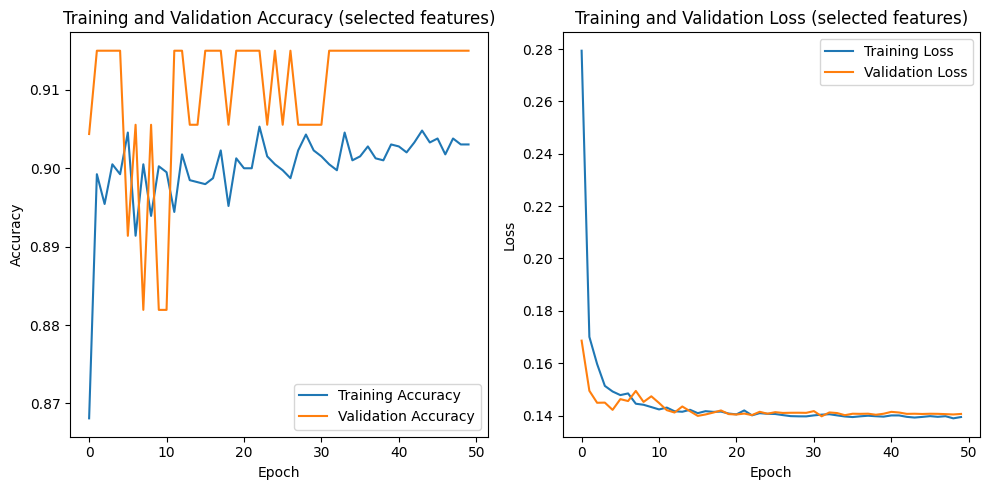

In [55]:


# Split data with selected features
X_train_new, X_temp_new, y_train_new, y_temp_new = train_test_split(X_new, target, test_size=0.3, random_state=42, stratify=target)
X_val_new, X_test_new, y_val_new, y_test_new = train_test_split(X_temp_new, y_temp_new, test_size=0.5, random_state=42, stratify=y_temp_new)

# Create and train the FFNN model with selected features
model_new = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_new.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model_new.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_new = model_new.fit(X_train_new, y_train_new, epochs=50, batch_size=32, validation_data=(X_val_new, y_val_new))

# Evaluate the new model
loss_new, accuracy_new = model_new.evaluate(X_test_new, y_test_new)
print(f"Test Loss (with selected features): {loss_new:.4f}")
print(f"Test Accuracy (with selected features): {accuracy_new:.4f}")

# Visualization for the new model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_new.history['accuracy'], label='Training Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (selected features)')

plt.subplot(1, 2, 2)
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (selected features)')

plt.tight_layout()
plt.show()

**RNN**

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8688 - loss: 0.4067 - val_accuracy: 0.9150 - val_loss: 0.1534
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9043 - loss: 0.1531 - val_accuracy: 0.9150 - val_loss: 0.1488
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8997 - loss: 0.1525 - val_accuracy: 0.8878 - val_loss: 0.1557
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8938 - loss: 0.1572 - val_accuracy: 0.9150 - val_loss: 0.1473
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9119 - loss: 0.1493 - val_accuracy: 0.8878 - val_loss: 0.1555
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8949 - loss: 0.1525 - val_accuracy: 0.9150 - val_loss: 0.1459
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9029 - loss: 0.1520 - val_accuracy: 0.9150 - val_loss: 0.1465
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9082 - loss: 0.1451 - val_accuracy: 0.

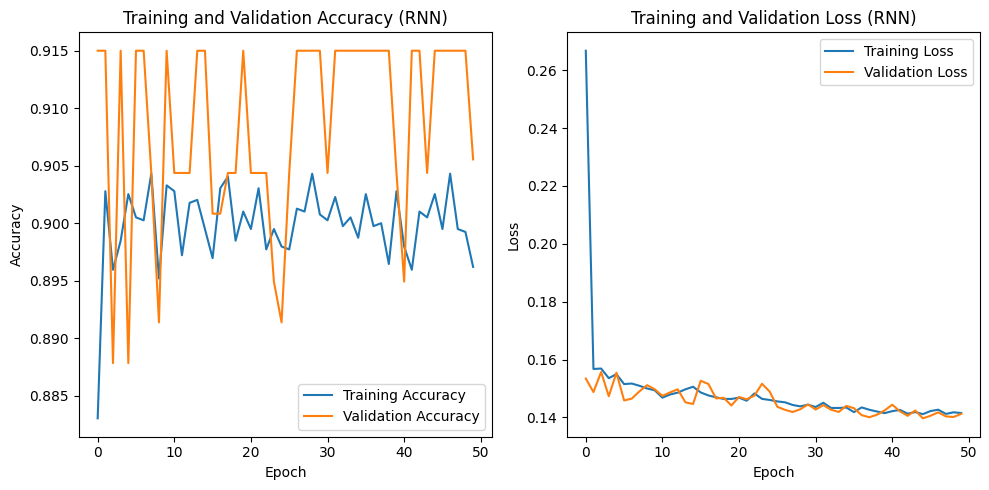

In [61]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential

# Reshape the data for RNN (assuming each feature is a time step)
X_train_rnn = np.expand_dims(X_train_new, axis=2)  # Reshape for RNN input
X_val_rnn = np.expand_dims(X_val_new, axis=2)
X_test_rnn = np.expand_dims(X_test_new, axis=2)


# Define the RNN model
model_rnn = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
history_rnn = model_rnn.fit(X_train_rnn, y_train_new, epochs=50, batch_size=32, validation_data=(X_val_rnn, y_val_new))

# Evaluate the RNN model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test_new)
print(f"Test Loss (RNN): {loss_rnn:.4f}")
print(f"Test Accuracy (RNN): {accuracy_rnn:.4f}")

# Visualization for the RNN model
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (RNN)')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (RNN)')

plt.tight_layout()
plt.show()

**CNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7131 - loss: 0.5462 - val_accuracy: 0.8749 - val_loss: 0.2507
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.2131 - val_accuracy: 0.9150 - val_loss: 0.1742
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9031 - loss: 0.1636 - val_accuracy: 0.9044 - val_loss: 0.1603
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8950 - loss: 0.1633 - val_accuracy: 0.8914 - val_loss: 0.1564
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9039 - loss: 0.1534 - val_accuracy: 0.9150 - val_loss: 0.1515
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9043 - loss: 0.1493 - val_accuracy: 0.8819 - val_loss: 0.1705
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9030 - loss: 0.1589 - val_accuracy: 0.8949 - val_loss: 0.1524
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9045 - loss: 0.1464 - val_accuracy: 0.

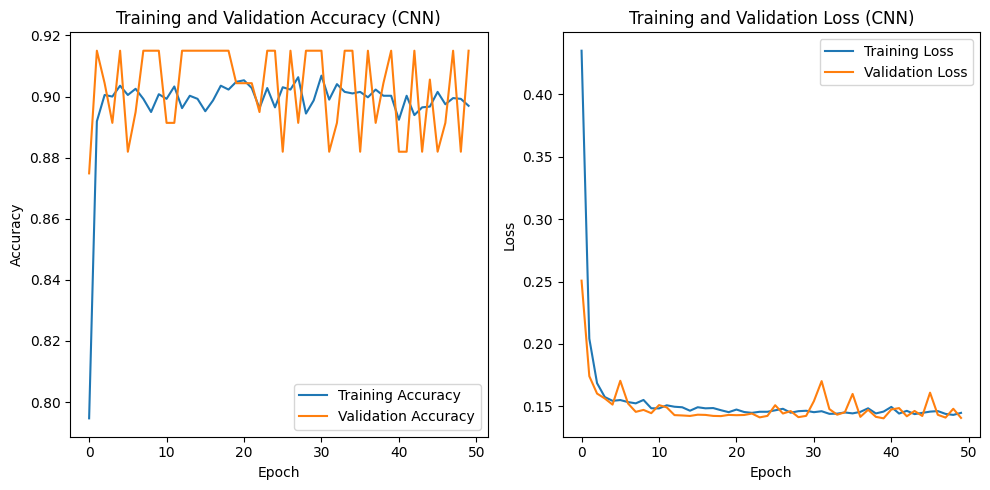

In [62]:


# Reshape the data for CNN
X_train_cnn = np.expand_dims(X_train_new, axis=2)
X_val_cnn = np.expand_dims(X_val_new, axis=2)
X_test_cnn = np.expand_dims(X_test_new, axis=2)

# Define the CNN model
model_cnn = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train_new, epochs=50, batch_size=32, validation_data=(X_val_cnn, y_val_new))

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_new)
print(f"Test Loss (CNN): {loss_cnn:.4f}")
print(f"Test Accuracy (CNN): {accuracy_cnn:.4f}")

# Visualization for the CNN model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (CNN)')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (CNN)')

plt.tight_layout()
plt.show()

**LSTM**

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5934 - loss: 0.6734 - val_accuracy: 0.6175 - val_loss: 0.6507
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6800 - loss: 0.5253 - val_accuracy: 0.9055 - val_loss: 0.1900
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8817 - loss: 0.2004 - val_accuracy: 0.9091 - val_loss: 0.1803
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8970 - loss: 0.1801 - val_accuracy: 0.8760 - val_loss: 0.1835
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8919 - loss: 0.1735 - val_accuracy: 0.9091 - val_loss: 0.1718
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8921 - loss: 0.1760 - val_accuracy: 0.9091 - val_loss: 0.1704
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9036 - loss: 0.1693 - val_accuracy: 0.9091 - val_loss: 0.1730
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8968 - loss: 0.1743 - val_accu

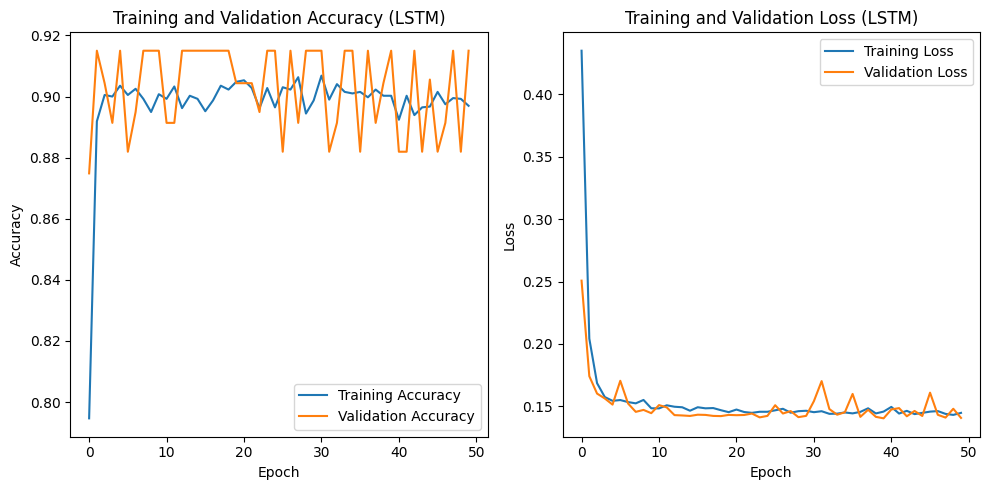

In [66]:
# prompt: Build a LSTM model using the earlier features but with regularization techniques.

# ... (Your existing code)

# Reshape the data for LSTM (no changes needed here)
X_train_lstm = np.expand_dims(X_train_new, axis=2)
X_val_lstm = np.expand_dims(X_val_new, axis=2)
X_test_lstm = np.expand_dims(X_test_new, axis=2)

# Define the LSTM model with regularization
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
model_lstm.add(Dropout(0.2))  # Dropout regularization
model_lstm.add(LSTM(32, activation='relu'))
model_lstm.add(Dropout(0.2)) # Dropout regularization
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train_new, epochs=50, batch_size=32, validation_data=(X_val_lstm, y_val_new), callbacks=[early_stopping])

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_new)
print(f"Test Loss (LSTM with Regularization): {loss_lstm:.4f}")
print(f"Test Accuracy (LSTM with Regularization): {accuracy_lstm:.4f}")

# Visualization for the CNN model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (LSTM)')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (LSTM)')

plt.tight_layout()
plt.show()

**Comparision**

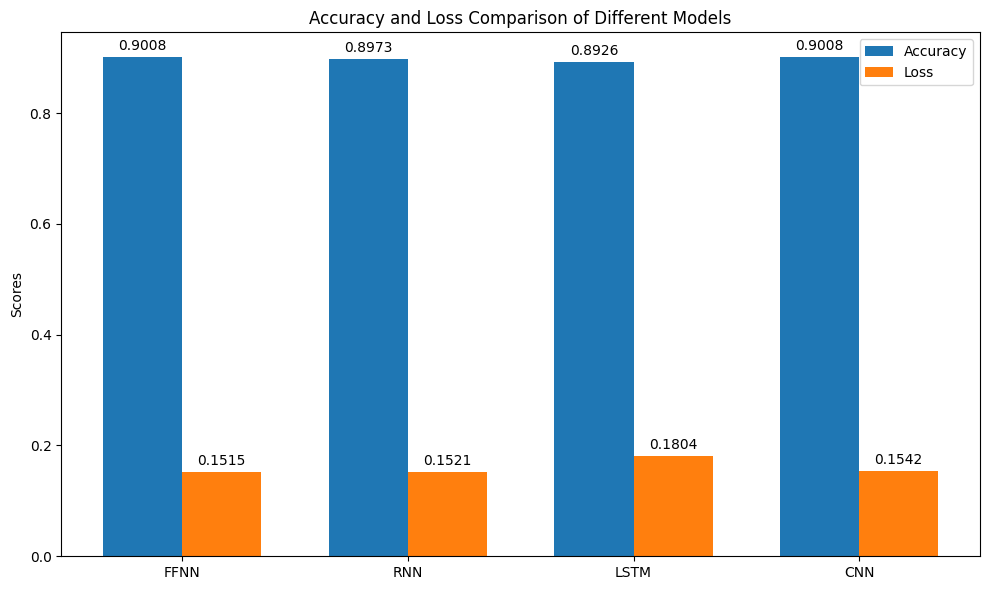

In [67]:

import matplotlib.pyplot as plt

# Assuming you have the following variables from your previous code:
# accuracy_new, loss_new
# accuracy_rnn, loss_rnn
# accuracy_cnn, loss_cnn
# accuracy_lstm, loss_lstm

# Create a dictionary to store the results
results = {
    'FFNN': {'Accuracy': accuracy_new, 'Loss': loss_new},
    'RNN': {'Accuracy': accuracy_rnn, 'Loss': loss_rnn},
    'LSTM': {'Accuracy': accuracy_lstm, 'Loss': loss_lstm},
    'CNN': {'Accuracy': accuracy_cnn, 'Loss': loss_cnn},
}

# Create the bar graph
models = list(results.keys())
accuracy = [results[model]['Accuracy'] for model in models]
loss = [results[model]['Loss'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, loss, width, label='Loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Loss Comparison of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()